<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"camilofarelo","key":"8d67e7e0e17ca788f2ecd4c3599f60fd"}'}

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sureshbhusare/titanic-dataset-from-kaggle

  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 53.0MB/s]


In [5]:
!ls

kaggle.json  sample_data  titanic-dataset-from-kaggle.zip


In [6]:
!unzip titanic-dataset-from-kaggle.zip

Archive:  titanic-dataset-from-kaggle.zip
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df_train=pd.read_csv('train.csv')#Importar el dataset
df_train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survival - Si el pasajero sobrevivio (0 = No; 1 = Si) \
Pclass - clase de pasajero (1 = 1st; 2 = 2nd; 3 = 3rd)\
Sex - Sexo (masculino = 0 ; femenino =1)\
Age - Edad\
Sibsp - Numero de Hermanos/Esposos Abordo\
Parch - Numero de Padres/Niños Abordo\
Fare - Tarifa del Pasajero\
Embarked - Puerto de Embarcacion

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Por simple intuicion podemos eliminar las siguientes columnas. En el caso de la columna de la cabina, tiene demasiados valores nulos, por lo cual la mejor opcion es eliminarlos.

In [ ]:
df_train.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Se puede ver que en la columna de la Edad y Embarked, hay valores nulos y para aplicar una estrategia hay que conocer su distribucion.

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


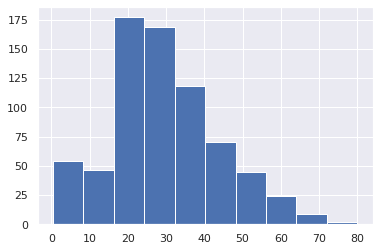

In [ ]:
df_train['Age'].hist()

Como la edad debe ser un valor entero, lo mejor es llenarlo con  la mediana.

In [ ]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Como la columna de Embarked tiene pocos valores nulos y es categorica, lo mejor es llenarla con el valor mas frecuente.

In [ ]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

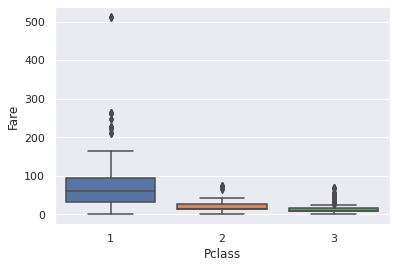

In [ ]:
sns.boxplot(data=df_train,x='Pclass',y='Fare')

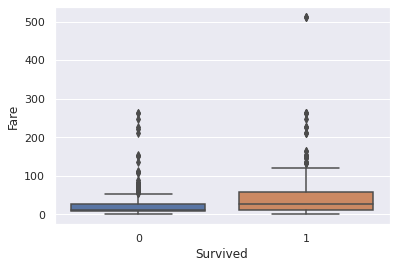

In [ ]:
sns.boxplot(data=df_train,x='Survived',y='Fare')

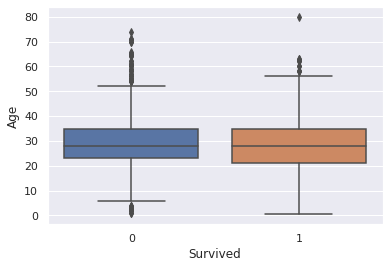

In [ ]:
sns.boxplot(data=df_train,x='Survived',y='Age')

In [ ]:
Hay varios valores que son atipicos en la tarifa cuando los pasajeros son de primera clase. 

In [ ]:
df_train.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [ ]:
Q3_Pclass=df_train.groupby('Pclass').Fare.describe().iloc[0,6]
Q1_Pclass=df_train.groupby('Pclass').Fare.describe().iloc[0,4]
IQR=Q3_Pclass-Q1_Pclass
sup=Q3_Pclass+1.5*IQR
inf=Q1_Pclass-1.5*IQR

In [ ]:
Q3_Pclass

93.5

In [ ]:
df_train.loc[(df_train.Fare<inf) | (df_train.Fare>sup)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C
311,1,1,female,18.0,2,2,262.3750,C
341,1,1,female,24.0,3,2,263.0000,S
377,0,1,male,27.0,0,2,211.5000,C
380,1,1,female,42.0,0,0,227.5250,C
438,0,1,male,64.0,1,4,263.0000,S


Como son pocos datos que son atipicos, se pueden eliminar.

In [ ]:
df_train.drop(index=df_train.loc[(df_train.Fare<inf) | (df_train.Fare>sup)].index,inplace=True)

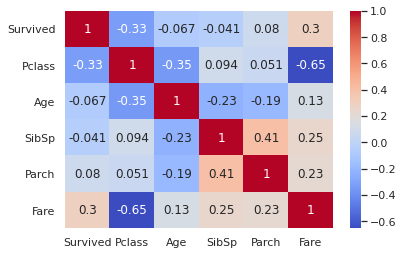

In [ ]:
corr=df_train.corr()
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

In [ ]:
#Separacion de las caractersticas y la variable objetivo
X_train=df_train.drop(columns=['Survived'])
y_train=df_train['Survived']

In [ ]:
#Preprocesamiento de los datos.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_trans=Pipeline(steps=[('ss',StandardScaler())])
ohe=OneHotEncoder(drop='first')
num_cols=X_train.select_dtypes(exclude='object').columns
cat_cols=X_train.select_dtypes(include='object').columns
cat_trans=Pipeline(steps=[('ohe',ohe)])
ct=ColumnTransformer(transformers=[('numtrans',num_trans,num_cols),
                                   ('cattrans',cat_trans,cat_cols)])

## Usando Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
clf1=Pipeline([('ct',ct),
              ('lr',LogisticRegression())])

In [ ]:
scores=cross_validate(clf1,X_train,y_train,cv=3,return_train_score=True,scoring='accuracy')

In [ ]:
print(f"train score {scores['train_score'].mean()}")
print(f"validation score {scores['test_score'].mean()}")

train score 0.8002324569212812
validation score 0.794489868467828


Con este metodo se obtienen buenos puntajes tanto de entrenamiento como de prueba, con lo cual no hay sobre ajuste.

## Usando SVM

In [ ]:
from sklearn.svm import SVC
ct2=ColumnTransformer(transformers=[('numtrans',num_trans,num_cols),
                                   ('cattrans',cat_trans,cat_cols)])
model2=Pipeline([('ct',ct2),
                 ('svm',SVC())])
model2.get_params()

In [ ]:
#Busqueda de Hiperparametros
from sklearn.model_selection import GridSearchCV
dic={'svm__kernel':['rbf','sigmoid','poly'],
     'svm__gamma':[1,0.1,0.5,0.01],
     'svm__C':[1,10]}
clf2=GridSearchCV(model2,param_grid=dic,scoring='accuracy',cv=3, return_train_score=True)

In [ ]:
clf2.fit(X_train,y_train)

In [ ]:
imax=list(clf2.cv_results_['mean_test_score']).index(clf2.best_score_)
print(f"Mejores hiperparametros: {clf2.best_params_}")
print(f"Train Score: {clf2.cv_results_['mean_train_score'][imax]}")
print(f"Validation Score: {clf2.best_score_}")      

Mejores hiperparametros: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train Score: 0.82778898846618
Validation Score: 0.8197614251293598


Usando SVM, mejoran los puntajes y además no hay sobre ajuste.

## Usando Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ct3=ColumnTransformer(transformers=[('numtrans',num_trans,num_cols),
                                   ('cattrans',cat_trans,cat_cols)])
model3=Pipeline([('ct',ct3),
                 ('dt',DecisionTreeClassifier())])
model3.get_params()

In [ ]:
#Busqueda de Hiperparametros
dic={'dt__criterion':['gini','entropy'],
     'dt__max_depth':[2,4,6,8,12,16]}
clf3=GridSearchCV(model3,param_grid=dic,scoring='accuracy',cv=3,return_train_score=True)

In [ ]:
clf3.fit(X_train,y_train)

In [ ]:
imax=list(clf3.cv_results_['mean_test_score']).index(clf3.best_score_)
print(f"Mejores hiperparametros: {clf3.best_params_}")
print(f"Train Score: {clf3.cv_results_['mean_train_score'][imax]}")
print(f"Validation Score: {clf3.best_score_}") 

Mejores hiperparametros: {'dt__criterion': 'entropy', 'dt__max_depth': 4}
Train Score: 0.8369725206243693
Validation Score: 0.815171623810088


Con DT, hay buenos resultados, pero un poco de sobre ajuste.

## Usando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ct4=ColumnTransformer(transformers=[('numtrans',num_trans,num_cols),
                                   ('cattrans',cat_trans,cat_cols)])
model4=Pipeline([('ct',ct4),
                 ('knn',KNeighborsClassifier())])
model4.get_params()

In [ ]:
#Busqueda de Hiperparametros
dic={'knn__n_neighbors':[1,3,5,7,9,11,13,15]}
clf4=GridSearchCV(model4,param_grid=dic,scoring='accuracy',cv=3,return_train_score=True)

In [ ]:
clf4.fit(X_train,y_train)

In [ ]:
imax=list(clf4.cv_results_['mean_test_score']).index(clf4.best_score_)
print(f"Mejores hiperparametros: {clf4.best_params_}")
print(f"Train Score: {clf4.cv_results_['mean_train_score'][imax]}")
print(f"Validation Score: {clf4.best_score_}") 

Mejores hiperparametros: {'knn__n_neighbors': 9}
Train Score: 0.8352543177636655
Validation Score: 0.7922147173835762


Este clasificador tiene los peores resultados porque mejora el accuracy del entrenamiento pero los de validacion son mucho peor comparado con los otros, es el que más presenta sobre ajuste.

El mejor clasificador para este dataset es el SVM.